In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### ***Contexto***

Você é analista de dados júnior em um e-commerce de eletrônicos. A empresa está preparando uma campanha promocional chamada “4 Horas de Descontos”, que vai acontecer das 18h às 22h. Existem duas estratégias sendo avaliadas:
- Desconto fixo de 15% em todos os produtos ao longo das 4 horas de campanha.
- Desconto progressivo, onde o desconto aumenta ao longo do tempo (10-17%).
O time de marketing acredita que os descontos progressivos podem atrair mais consumidores ao longo da campanha, mas está em dúvida se essa abordagem realmente é eficaz. Eles querem sua ajuda para responder:
**“Os descontos progressivos realmente aumentam o faturamento ou apenas atraem mais pessoas que gastam menos?”**

Dados disponíveis
- Total de usuários esperados com desconto fixo: 60.000
- Total de usuários esperados com desconto progressivo: 80.000
- Taxa média de conversão: 2%
- Ticket médio (sem desconto): R$ 350,00
- Duração da campanha: 4 horas (das 18h às 22h)

*Socorro, e agora?* <br>
Para essa tarefa, vamos usar os conceitos aprendidos no módulo de probabilidade e distribuição. Temos dois cenários: um com desconto fixo, que tende a atrair um público menor e mais estável ao longo do tempo; e outro com desconto progressivo, que geralmente atrai mais pessoas, especialmente perto do fim da campanha, quando os descontos são maiores.
Na prática, estratégias com desconto progressivo costumam gerar mais engajamento porque criam um senso de urgência e expectativa, o cliente fica 
acompanhando a campanha esperando o melhor momento para comprar. Por isso, podemos modelar o primeiro cenário com uma distribuição normal, concentrada no meio da campanha, e o segundo com uma distribuição assimétrica à esquerda, já que os acessos tendem a aumentar conforme o tempo passa e os descontos ficam mais atrativos.

**Estrutura sugerida**


**1.** Estimar pedidos e faturamento com desconto fixo
- Considere 60.000 usuários e 15% de desconto fixo.
- Modele os acessos como uma distribuição normal, com pico entre 19h e 20h.
- Calcule o número de pedidos por hora e o faturamento total da campanha.

**2.** Estimar pedidos e faturamento com descontos progressivos
- Considere 80.000 usuários e ticket ajustado conforme o horário.
- Modele os acessos com uma distribuição assimétrica, com mais acessos nas últimas horas.
- Calcule o número de pedidos por hora e o faturamento total da campanha.

**3.** Comparar os dois cenários
- Monte uma tabela com o número de pedidos e receita por hora em cada cenário.
- Crie um gráfico comparando os faturamentos por hora.
- Responda: qual cenário gera maior faturamento total?
- A estratégia de desconto parece vantajosa do ponto de vista de receita? Justifique.


##### **Desconto fixo**
- desconto: **15%**.
- clientes: **60.000**.
- Taxa média de conversão: **2%**.
- Ticket médio (sem desconto): **R$ 350,00**.
- Duração da campanha: **4 horas ***(das 18h às 22h)*****.


In [289]:
### modelagem dos dados das vendas de desconto fixo
qtde_clientes = 60000
h_inicio = 18
tx_conversao = 0.02
ticket_med = 350 ## sem desconto
desconto_fixo = 0.15

df_distr_clientes_horario_fixo = pd.DataFrame({
    'p qtde clientes': [.05, .1, .2, .6, 1.2, 2, 2.9, 3.4, 3.4, 2.9, 2, 1.2, .6, .2, .1, .05],  # y
    'h visita (apartir do inicio)': [.25, .5, .75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4] # x
})

df_distr_clientes_horario_fixo['p qtde clientes'] = df_distr_clientes_horario_fixo['p qtde clientes'].apply(lambda x: np.exp(x)/np.sum(np.exp(df_distr_clientes_horario_fixo['p qtde clientes'])))

df_distr_clientes_horario_fixo['qtde clientes'] = np.floor(qtde_clientes*df_distr_clientes_horario_fixo['p qtde clientes']).astype(int)
df_distr_clientes_horario_fixo.loc[df_distr_clientes_horario_fixo['h visita (apartir do inicio)']==2, 'qtde clientes'] += (qtde_clientes-df_distr_clientes_horario_fixo['qtde clientes'].sum())

df_distr_clientes_horario_fixo['h visita'] = df_distr_clientes_horario_fixo['h visita (apartir do inicio)']+h_inicio
df_distr_clientes_horario_fixo['h presença'] = df_distr_clientes_horario_fixo['h visita'].shift().fillna(h_inicio).astype(str) + 'h ~ ' + df_distr_clientes_horario_fixo['h visita'].astype(str) + 'h'
df_distr_clientes_horario_fixo['h visita'] = df_distr_clientes_horario_fixo['h visita'].astype(str)+'h'

df_distr_clientes_horario_fixo['qtde clientes convertidos'] = np.floor(df_distr_clientes_horario_fixo['qtde clientes']*tx_conversao).astype(int)
df_distr_clientes_horario_fixo.loc[df_distr_clientes_horario_fixo['h visita (apartir do inicio)']==2, 'qtde clientes convertidos'] += (df_distr_clientes_horario_fixo['qtde clientes']*tx_conversao).sum()-df_distr_clientes_horario_fixo['qtde clientes convertidos'].sum()

df_distr_clientes_horario_fixo['faturamento (sem desconto)'] = df_distr_clientes_horario_fixo['qtde clientes convertidos']*ticket_med
df_distr_clientes_horario_fixo['faturamento acumulado (sem desconto)'] = df_distr_clientes_horario_fixo['faturamento (sem desconto)'].cumsum()
df_distr_clientes_horario_fixo['desconto'] = desconto_fixo
df_distr_clientes_horario_fixo['faturamento'] = df_distr_clientes_horario_fixo['qtde clientes convertidos']*(ticket_med*(1-desconto_fixo))
df_distr_clientes_horario_fixo['faturamento acumulado'] = df_distr_clientes_horario_fixo['faturamento'].cumsum()

df_distr_clientes_horario_fixo = df_distr_clientes_horario_fixo[[
    'p qtde clientes', 'h visita (apartir do inicio)', 'h visita', 'h presença', 'qtde clientes', 'qtde clientes convertidos', 'faturamento (sem desconto)', 'faturamento acumulado (sem desconto)', 'desconto', 'faturamento', 'faturamento acumulado'
    ]]

display(df_distr_clientes_horario_fixo)

,p qtde clientes,h visita (apartir do inicio),h visita,h presença,qtde clientes,qtde clientes convertidos,faturamento (sem desconto),faturamento acumulado (sem desconto),desconto,faturamento,faturamento acumulado
0,0.008207,0.25,18.25h,18.0h ~ 18.25h,492,9,3150,3150,0.15,2677.5,2677.5
1,0.008628,0.50,18.5h,18.25h ~ 18.5h,517,10,3500,6650,0.15,2975.0,5652.5
2,0.009535,0.75,18.75h,18.5h ~ 18.75h,572,11,3850,10500,0.15,3272.5,8925.0
3,0.014225,1.00,19.0h,18.75h ~ 19.0h,853,17,5950,16450,0.15,5057.5,13982.5
4,0.025919,1.25,19.25h,19.0h ~ 19.25h,1555,31,10850,27300,0.15,9222.5,23205.0
5,0.057684,1.50,19.5h,19.25h ~ 19.5h,3461,69,24150,51450,0.15,20527.5,43732.5
6,0.141880,1.75,19.75h,19.5h ~ 19.75h,8512,170,59500,110950,0.15,50575.0,94307.5
7,0.233921,2.00,20.0h,19.75h ~ 20.0h,14041,286,100100,211050,0.15,85085.0,179392.5
8,0.233921,2.25,20.25h,20.0h ~ 20.25h,14035,280,98000,309050,0.15,83300.0,262692.5
9,0.141880,2.50,20.5h,20.25h ~ 20.5h,8512,170,59500,368550,0.15,50575.0,313267.5


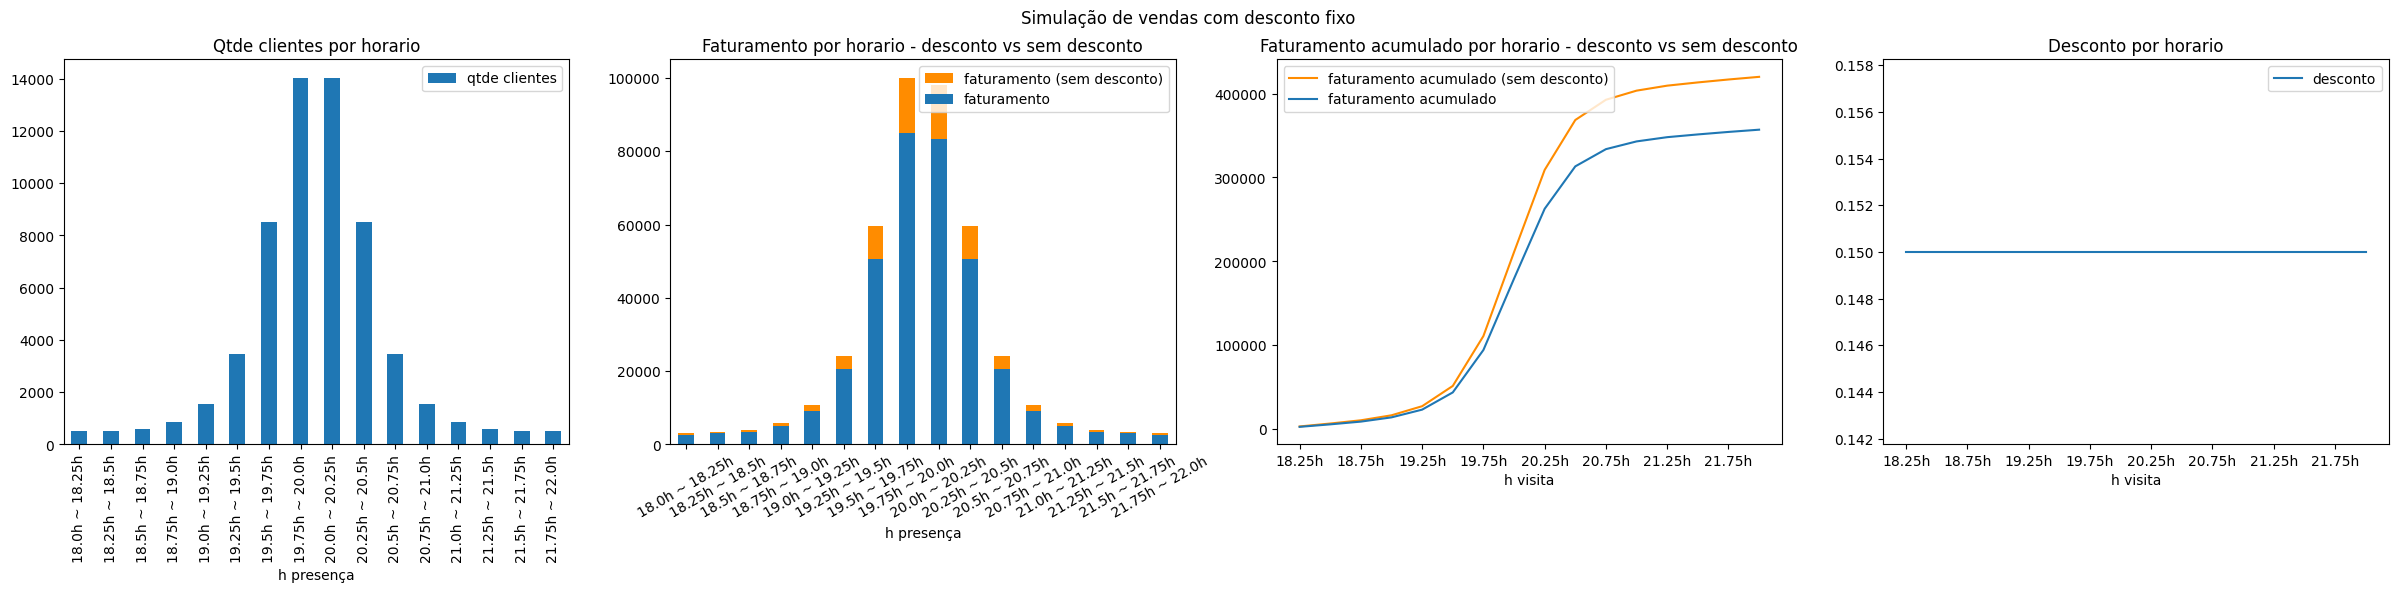

In [318]:
### graficos do comportamento das vendas com desconto fixo
plt.close('all')

fig, axs = plt.subplots(1, 4, figsize=(30,5))
fig.suptitle('Simulação de vendas com desconto fixo')

df_distr_clientes_horario_fixo.plot.bar(x='h presença', y='qtde clientes', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_title('Qtde clientes por horario')

df_distr_clientes_horario_fixo.plot.bar(x='h presença', y='faturamento (sem desconto)', ax=axs[1], color='darkorange')
df_distr_clientes_horario_fixo.plot.bar(x='h presença', y='faturamento', ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30)
axs[1].set_title('Faturamento por horario - desconto vs sem desconto')

df_distr_clientes_horario_fixo.plot.line(x='h visita', y='faturamento acumulado (sem desconto)', ax=axs[2], color='darkorange')
df_distr_clientes_horario_fixo.plot.line(x='h visita', y='faturamento acumulado', ax=axs[2])
axs[2].set_title('Faturamento acumulado por horario - desconto vs sem desconto')

df_distr_clientes_horario_fixo.plot.line(x='h visita', y='desconto', ax=axs[3])
axs[3].set_title('Desconto por horario')

plt.show()

##### **Desconto progresivo**
- desconto: **10% ~ 17%**.
- clientes: **80.000**.
- Taxa média de conversão: **2%**.
- Ticket médio (sem desconto): **R$ 350,00**.
- Duração da campanha: **4 horas ***(das 18h às 22h)*****.

In [291]:
### modelagem dos dados das vendas de desconto progressivo
qtde_clientes = 80000
h_inicio = 18
tx_conversao = 0.02
ticket_med = 350 ## sem desconto
desconto_fixo = (.10, .17)

df_distr_clientes_horario_progressivo = pd.DataFrame({
    'p qtde clientes': [.05, .075, .1, .14, .2, .3, .45, .6, .77, 1.1, 1.6, 2.2, 2.85, 3.7, 3.9, 2.3],  # y
    'h visita (apartir do inicio)': [.25, .5, .75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4] # x
})

df_distr_clientes_horario_progressivo['p qtde clientes'] = df_distr_clientes_horario_progressivo['p qtde clientes'].apply(lambda x: np.exp(x)/np.sum(np.exp(df_distr_clientes_horario_progressivo['p qtde clientes'])))

df_distr_clientes_horario_progressivo['qtde clientes'] = np.floor(qtde_clientes*df_distr_clientes_horario_progressivo['p qtde clientes']).astype(int)
df_distr_clientes_horario_progressivo.loc[df_distr_clientes_horario_progressivo['h visita (apartir do inicio)']==4, 'qtde clientes'] += (qtde_clientes-df_distr_clientes_horario_progressivo['qtde clientes'].sum())

df_distr_clientes_horario_progressivo['h visita'] = df_distr_clientes_horario_progressivo['h visita (apartir do inicio)']+h_inicio
df_distr_clientes_horario_progressivo['h presença'] = df_distr_clientes_horario_progressivo['h visita'].shift().fillna(h_inicio).astype(str) + 'h ~ ' + df_distr_clientes_horario_progressivo['h visita'].astype(str) + 'h'
df_distr_clientes_horario_progressivo['h visita'] = df_distr_clientes_horario_progressivo['h visita'].astype(str)+'h'

df_distr_clientes_horario_progressivo['qtde clientes convertidos'] = np.floor(df_distr_clientes_horario_progressivo['qtde clientes']*tx_conversao).astype(int)
df_distr_clientes_horario_progressivo.loc[
    df_distr_clientes_horario_progressivo['h visita (apartir do inicio)']==4, 'qtde clientes convertidos'] += int((df_distr_clientes_horario_progressivo['qtde clientes']*tx_conversao).sum())-int(df_distr_clientes_horario_progressivo['qtde clientes convertidos'].sum())

df_distr_clientes_horario_progressivo['faturamento (sem desconto)'] = df_distr_clientes_horario_progressivo['qtde clientes convertidos']*ticket_med
df_distr_clientes_horario_progressivo['faturamento acumulado (sem desconto)'] = df_distr_clientes_horario_progressivo['faturamento (sem desconto)'].cumsum()
df_distr_clientes_horario_progressivo['desconto'] = df_distr_clientes_horario_progressivo['h visita (apartir do inicio)'].apply(lambda x: ((desconto_fixo[1]-desconto_fixo[0])*x)/4 + (desconto_fixo[0]))
df_distr_clientes_horario_progressivo['faturamento'] = df_distr_clientes_horario_progressivo['qtde clientes convertidos']*(ticket_med*(1-df_distr_clientes_horario_progressivo['desconto']))
df_distr_clientes_horario_progressivo['faturamento acumulado'] = df_distr_clientes_horario_progressivo['faturamento'].cumsum()

df_distr_clientes_horario_progressivo = df_distr_clientes_horario_progressivo[[
    'p qtde clientes', 'h visita (apartir do inicio)', 'h visita', 'h presença', 'qtde clientes', 'qtde clientes convertidos', 'faturamento (sem desconto)', 'faturamento acumulado (sem desconto)', 'desconto', 'faturamento', 'faturamento acumulado'
    ]]

display(df_distr_clientes_horario_progressivo)

,p qtde clientes,h visita (apartir do inicio),h visita,h presença,qtde clientes,qtde clientes convertidos,faturamento (sem desconto),faturamento acumulado (sem desconto),desconto,faturamento,faturamento acumulado
0,0.007171,0.25,18.25h,18.0h ~ 18.25h,573,11,3850,3850,0.104375,3448.15625,3448.15625
1,0.007353,0.50,18.5h,18.25h ~ 18.5h,588,11,3850,7700,0.108750,3431.31250,6879.46875
2,0.007539,0.75,18.75h,18.5h ~ 18.75h,603,12,4200,11900,0.113125,3724.87500,10604.34375
3,0.007846,1.00,19.0h,18.75h ~ 19.0h,627,12,4200,16100,0.117500,3706.50000,14310.84375
4,0.008332,1.25,19.25h,19.0h ~ 19.25h,666,13,4550,20650,0.121875,3995.46875,18306.31250
5,0.009208,1.50,19.5h,19.25h ~ 19.5h,736,14,4900,25550,0.126250,4281.37500,22587.68750
6,0.010698,1.75,19.75h,19.5h ~ 19.75h,855,17,5950,31500,0.130625,5172.78125,27760.46875
7,0.012429,2.00,20.0h,19.75h ~ 20.0h,994,19,6650,38150,0.135000,5752.25000,33512.71875
8,0.014732,2.25,20.25h,20.0h ~ 20.25h,1178,23,8050,46200,0.139375,6928.03125,40440.75000
9,0.020492,2.50,20.5h,20.25h ~ 20.5h,1639,32,11200,57400,0.143750,9590.00000,50030.75000


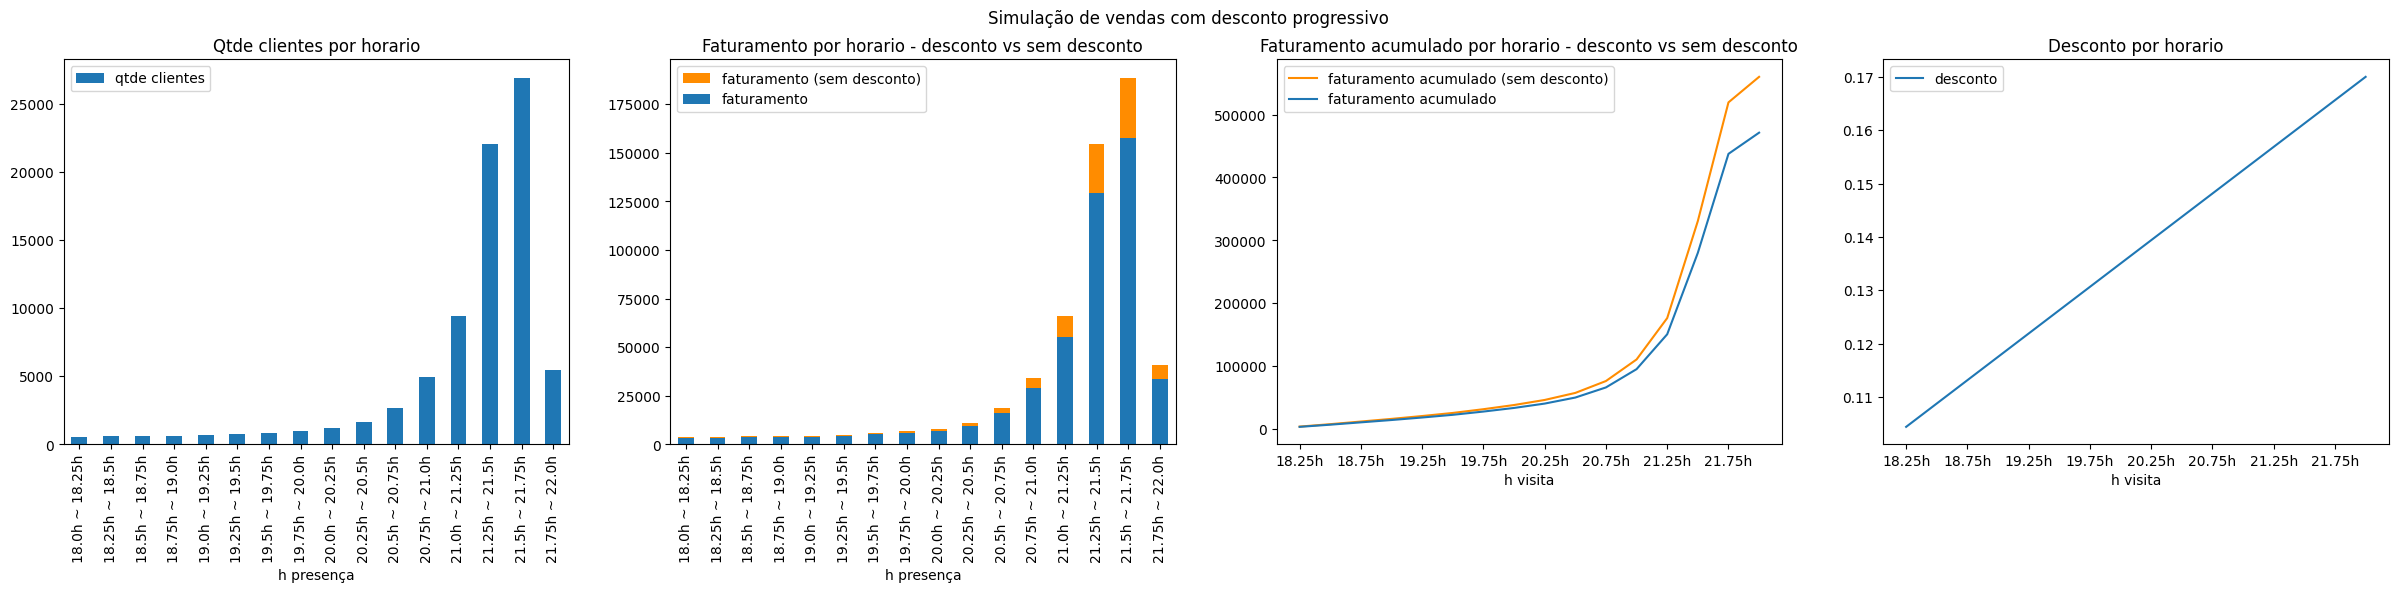

In [312]:
### graficos do comportamento das vendas com desconto progressivo
plt.close('all')

fig, axs = plt.subplots(1, 4, figsize=(30,5))
fig.suptitle('Simulação de vendas com desconto progressivo')

df_distr_clientes_horario_progressivo.plot.bar(x='h presença', y='qtde clientes', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_title('Qtde clientes por horario')

df_distr_clientes_horario_progressivo.plot.bar(x='h presença', y='faturamento (sem desconto)', ax=axs[1], color='darkorange')
df_distr_clientes_horario_progressivo.plot.bar(x='h presença', y='faturamento', ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_title('Faturamento por horario - desconto vs sem desconto')

df_distr_clientes_horario_progressivo.plot.line(x='h visita', y='faturamento acumulado (sem desconto)', ax=axs[2], color='darkorange')
df_distr_clientes_horario_progressivo.plot.line(x='h visita', y='faturamento acumulado', ax=axs[2])
axs[2].set_title('Faturamento acumulado por horario - desconto vs sem desconto')

df_distr_clientes_horario_progressivo.plot.line(x='h visita', y='desconto', ax=axs[3])
axs[3].set_title('Desconto por horario')

plt.show()

##### ***Desconto fixo vs progressivo***

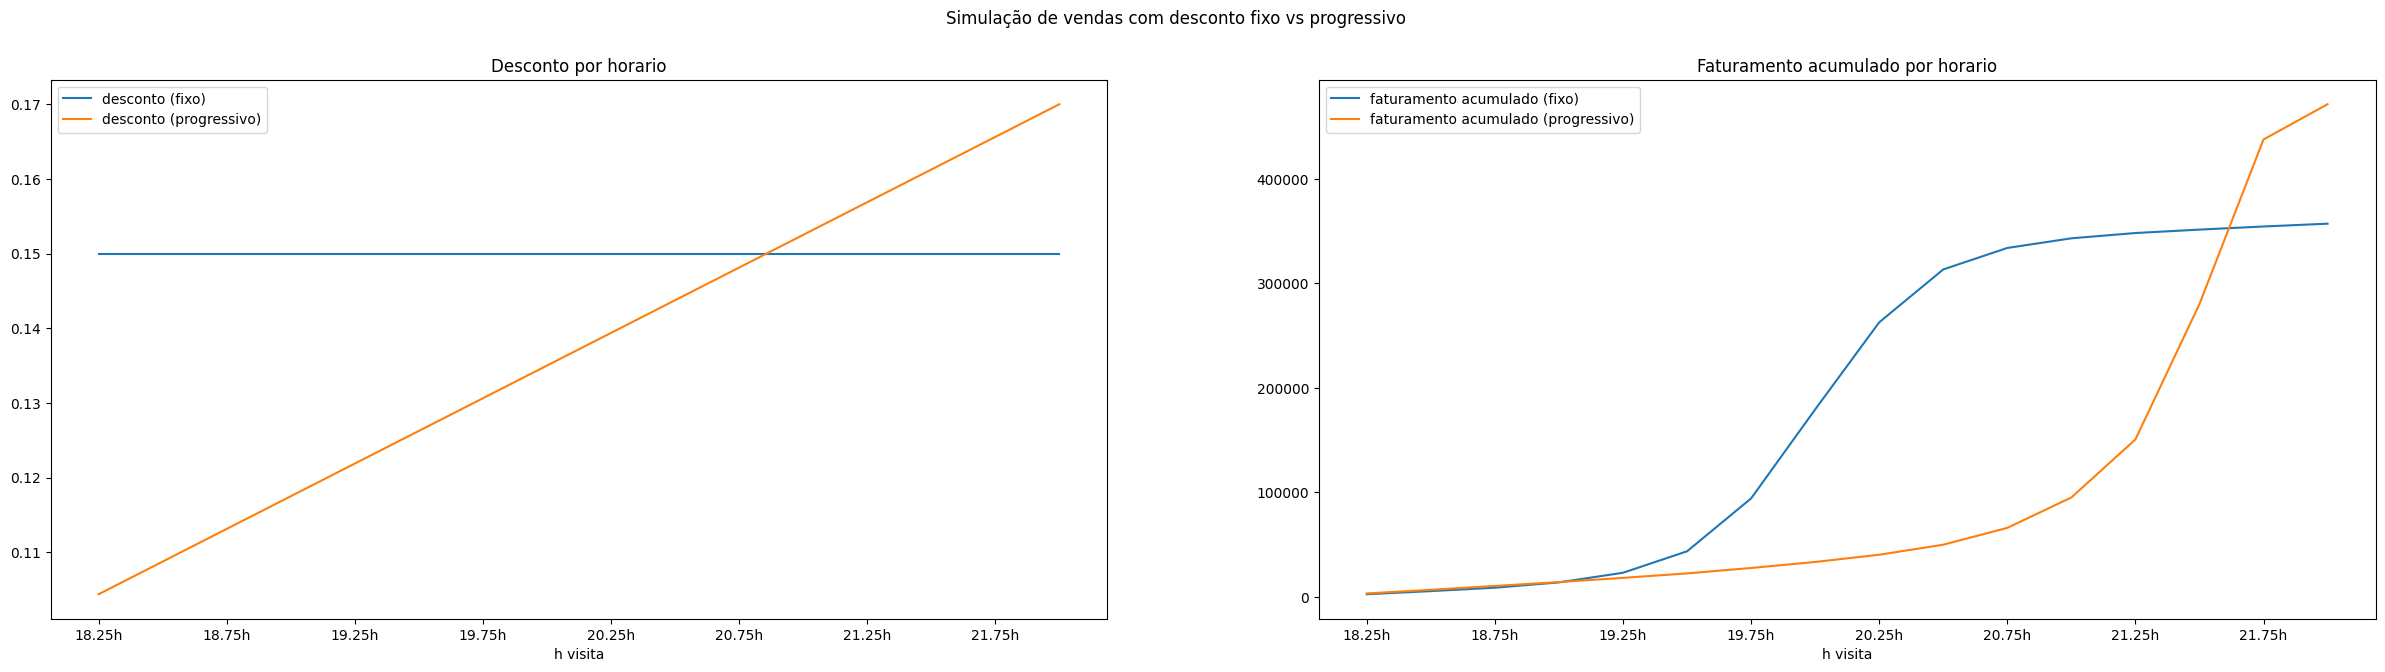

In [313]:
plt.close('all')

fig, axs = plt.subplots(1, 2, figsize=(30, 7))
fig.suptitle('Simulação de vendas com desconto fixo vs progressivo')

df_distr_clientes_horario_fixo.plot.line(x='h visita', y='desconto', ax=axs[0], label='desconto (fixo)')
df_distr_clientes_horario_progressivo.plot.line(x='h visita', y='desconto', ax=axs[0], label='desconto (progressivo)')
axs[0].set_title('Desconto por horario')

df_distr_clientes_horario_fixo.plot.line(x='h visita', y='faturamento acumulado', ax=axs[1], label='faturamento acumulado (fixo)')
df_distr_clientes_horario_progressivo.plot.line(x='h visita', y='faturamento acumulado', ax=axs[1], label='faturamento acumulado (progressivo)')
axs[1].set_title('Faturamento acumulado por horario')

plt.show()

##### ***Q&A***

In [11]:
### perguntas e respostas

print('Qual cenário gera maior faturamento total?\n' \
' R: O cenário com o desconto progressivo.')
print('A estratégia de desconto parece vantajosa do ponto de vista de receita? Justifique.\n ' \
'R: Depende, se caso as peças vendidas fossem vender da mesma forma mas em mais dias e se não precisarmos do dinheiro rapido, então é mais vantajoso não dar o desconto. Agora se precisarmos do dinheiro rapido, então dar o desconto é uma boa estratégia.')

Qual cenário gera maior faturamento total?
 R: O cenário com o desconto progressivo.
A estratégia de desconto parece vantajosa do ponto de vista de receita? Justifique.
 R: Depende, se caso as peças vendidas fossem vender da mesma forma mas em mais dias e se não precisarmos do dinheiro rapido, então é mais vantajoso não dar o desconto. Agora se precisarmos do dinheiro rapido, então dar o desconto é uma boa estratégia.
